
# Titanic - Machine Learning Final Project

Group 1: Fernanda Garcia, Gabriela Brogim, Isabella Nascimento e Julia Duó

# Executive Summary


* In terms of data preparation, our strategy was to focus on encoding, given that most of our variables were not numeric. The main variables encoded were Cabin, Age, Embarked, Sex, Name and Family Size.

* Sex, Fare, Age, Cabin_Digit and Pclass are the main characteristics that explain if a Titanic passenger survived the tragedy.
The best model was the Logistic Regression with an accuracy higher than 80%. 

* The machine learning models have not performed as good as expected with an average accuracy of 50%. 

* Further paths of development include creating a variable Has_Title, which would encode the extracted titles that are considered rare, and combining the best models using stacking techniques. 




# Contents 

1.   Download the data
2.   General Information
3.   Data Preparation and Featuring Engeneering


> 3.1 Variable Cabin

> 3.2 Variable Age 

> 3.3 Variable Embarked

> 3.4 Variable Sex

> 3.5 Variable Name

> 3.6 Variable Family Size 


4.   Outliers 
5.   Correlation Matrix 
6.   Data Visualization
7.   Preparing to run the Models 
8.   Decision Tree 
9.   Random Forest 
10.  Adaboosting and XG Boosting
11.  Logistic Regression
11.  Insights and Results 
12.  Conclusion




















# ***

# Section 1 - Download the Data

Here you can find the original data and challenge: https://www.kaggle.com/c/titanic/data

In [ ]:
# First, we will load all the necessary libraries and packages to run our 
# analysis. 

import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import graphviz
import pprint

from sklearn import tree as sk_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import median_absolute_error, mean_absolute_error, r2_score, max_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import svm

import io

In [ ]:
# Now, we will upload the dataset 

from google.colab import files

uploaded = files.upload()

titanic_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

titanic_df.head()
titanic_df.info()
type(titanic_df)

Saving train.csv to train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


pandas.core.frame.DataFrame

In [ ]:
# Lets first take a look at the shape of our data 

titanic_df.shape

(891, 12)

In [ ]:
# Splitting the dataset into train and test

train_df, test_df = train_test_split(titanic_df, test_size = 0.3, random_state = 7)
#train_df, val_df = train_test_split(train_df, test_size = 0.3, random_state = 7)


In [ ]:
# Checking for the size of our new datasets and if our splitting code worked 

# This step is important to see if the matrix that we will build to test the models 
# is correct

# Train dataset shape 
train_df.shape

(623, 12)

In [ ]:
# Test dataset shape
test_df.shape

(268, 12)

In [ ]:
# Now, we will concat these dataframes in one (df) so we can apply all the transformations 
# at the same time to all the dataframes 

df = pd.concat((train_df.loc[:,'Pclass':'Embarked'],
                test_df.loc[:,'Pclass':'Embarked']))


In [ ]:
# Checking if everything went well when concating the data 

df.shape

(891, 10)

# Section 2 - General Information

In [ ]:
# Lets see how the dataframe looks like and get a view from its 5 observations 

df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
191,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S


In [ ]:
# Now, lets get a look at the columns that we have our disposal 

df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Checking some initial statistics 

df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking the type of the variables available for our analysis 

# This step is important because all variables that are categorical will have to go 
# through enconding so the algoritim can read it 

df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [ ]:
# First, we dropped the variable Name because we did not see any information that could
# be extracted. After the first presentation and the comments made by the professor and 
# our colleagues, we tried to see if there was any lasting information in Name that we
# could use to improve our estimator. 

# Thus, we want to check if there is any patern that can be explored in Name. 
# Lets check the observations in this variable.

df['Name'].unique()

# After a quick look, we can see that profession might be an information that we can 
# take our of Name only if we can select the information between "," and ".". 
# This will be addressed in Section 3.3.

array(['Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Carbines, Mr. William', 'Greenberg, Mr. Samuel',
       'Elias, Mr. Joseph Jr',
       'Robins, Mrs. Alexander A (Grace Charity Laury)',
       'Trout, Mrs. William H (Jessie L)', 'Stead, Mr. William Thomas',
       'Leitch, Miss. Jessie Wills', 'Harrison, Mr. William',
       'Jenkin, Mr. Stephen Curnow',
       'Mellinger, Mrs. (Elizabeth Anne Maidment)', 'Lefebre, Miss. Ida',
       'Pekoniemi, Mr. Edvard', 'Stankovic, Mr. Ivan',
       'Sharp, Mr. Percival James R', 'Lester, Mr. James',
       'Odahl, Mr. Nils Martin', 'Farrell, Mr. James',
       'Rice, Master. Eric', 'Heikkinen, Miss. Laina',
       'Lefebre, Miss. Mathilde', 'Robbins, Mr. Victor',
       'Skoog, Mr. Wilhelm', 'Wick, Mrs. George Dennick (Mary Hitchcock)',
       'Yrois, Miss. Henriette ("Mrs Harbeck")',
       'Hagland, Mr. Ingvald Olai Olsen', 'Silven, Miss. Lyyli Karoliina',
       'Moubarek, Master. Gerios', 'Dodge, Master. Washington',
       '

In [ ]:
# Following the rationale used to study Name, we do the same thing for Cabin.

df['Cabin'].unique()

array([nan, 'C87', 'B94', 'A34', 'D48', 'D20', 'B20', 'C118', 'B41',
       'C49', 'C7', 'B22', 'B69', 'T', 'F2', 'B57 B59 B63 B66', 'C52',
       'A5', 'F4', 'B42', 'C83', 'C123', 'E25', 'D33', 'C82', 'D35', 'E8',
       'F G73', 'C23 C25 C27', 'C65', 'E68', 'B96 B98', 'B71', 'D17',
       'A6', 'D', 'E67', 'C22 C26', 'E17', 'G6', 'E34', 'B3', 'E44',
       'A36', 'D11', 'C86', 'C101', 'B78', 'A19', 'A7', 'C78', 'E33',
       'A24', 'B19', 'C54', 'E58', 'F G63', 'B49', 'B58 B60', 'B5', 'E50',
       'B18', 'E10', 'D47', 'B4', 'E40', 'D26', 'C125', 'D6', 'D7', 'B86',
       'E101', 'C95', 'E24', 'B51 B53 B55', 'B101', 'B73', 'B35', 'B102',
       'B38', 'C103', 'C106', 'B39', 'C126', 'C85', 'C99', 'C68', 'C124',
       'A14', 'B82 B84', 'C92', 'A20', 'C91', 'C93', 'A26', 'C90', 'E12',
       'D36', 'E38', 'E36', 'C47', 'D56', 'C46', 'F33', 'B77', 'E31',
       'C2', 'A10', 'B80', 'E77', 'C70', 'E63', 'C32', 'E46', 'E121',
       'D37', 'A32', 'D9', 'C50', 'D49', 'A23', 'B28', 'C30', 'C

In [ ]:
# Following the rationale used to study Name, we do the same thing for Ticket.

df['Ticket'].unique()

array(['350046', '28424', '250647', '2690', 'A/5. 3337', '240929',
       '113514', '248727', '112059', 'C.A. 33111', '250644', '4133',
       'STON/O 2. 3101294', '349239', '244358', 'A/4 48871', '7267',
       '367232', '382652', 'STON/O2. 3101282', 'PC 17757', '347088',
       '36928', '248747', '65303', '250652', '2661', '33638', '35273',
       '36947', '17474', '28403', '3474', 'PC 17596', '13567', '244270',
       'PC 17595', '9234', 'A./5. 2152', '3101264', '26707', '244310',
       '243847', '2664', '2699', 'WE/P 5735', '364849', 'LINE', '3101265',
       '347082', '364848', '12749', '363291', '113784', '230080',
       'W./C. 6609', 'PC 17608', '19947', '2626', 'PC 17754', '347081',
       '230136', '112379', 'SC/PARIS 2146', '112053', 'S.O.C. 14879',
       '312992', '36973', 'C.A. 24580', '345777', '113803', 'C.A. 34651',
       '349234', 'PC 17474', '349215', 'C.A. 31921', '220367', '373450',
       'PC 17572', '244373', '17421', 'PC 17597', '113503', '349218',
       '117

# ***

# Section 3 - Data Preparation and Feature Engeneering 

### Summary of the Data Prep and Featuring Engineering section: 

The Data Prep and Featuring Engineering section is organized in 5 main sectors. First, we run the traditional missing values analysis to see how many observations are missing and which variables have more NaN. This may be correlated with the final outcome. Thus, it is necessary to see which columns are less filled and what can we do with them. 

The missing values analysis shows three columns with missing values: (i) *Cabin*, (ii) *Age*, (iii) *Embarked*. The first variable has more than 70% of information missing, which led us to initially drop out this information. However, with a close look analysis we chose not to drop it, but to encode it in a way that it could give us extra information - this will be further explored in the **Variable Cabin section**. A similar decision was made with *Age*, which had its NaNs observations with the mean values. We chose, nevertheless, to encode this variable and create a new one that would encompass age bands (e.g. 0-1 years old are toddlers). Lastly, we had initially dropped the few missing values in Embarked, but then we encoded the variable as well.

The general information section gave us some guidelines into what we could do as data prep and featuring engineering for this problem. The variables at hand are *Name* and *Cabin*. Based in the initial information gathered from the *unique()* function, we managed to extract some extra information from these variables which allowed us to do the encoding. 

** 


> *VARIABLE CABIN*



We start filling the NaN values with No Cabin, because it is an object column. Then, we created a dummy variable that indicated if that information was NaN or not at the original column. We also did an encoding to get only the first letter of the observation, which indicates how high up in the Titanic ship. This can be correlated with survival rate in what comes to the time that an individual would take to reach the deck. For instance, individuals with a low Cabin_Digit position (lower cabins) would take longer to reach the rescue boat. We use hot encoding in this case because there is an order of importance (Cabins high up in the ship are more exclusive and closer to the rescue boats. 

**

> *VARIABLE AGE*



For Age, we start filling in the missing values with -1 and creating a dummy variable similar to the Cabin one. This is because we saw that there are more missing values in no survived than survived and we wanted to capture this information in our model. We followed to the encoding process where we created a new variable called *age_group*.  

**

> *VARIABLE EMBARKED* 


We did the hot encoding for the variable *Embarked* considering the route of the trip. Being (i) Southampton, England, (ii) Cherbourg, France, and (iii) Queenstown, Ireland. 


**

> *VARIABLE SEX* 


We did the hot encoding for sex because women had preference to get the rescue boats. 


**

> *VARIABLE NAME* 


For Name, our strategy was to select the title that the passengers had (e.g. Miss). This information encompasses not only class, age, and gender, but can bring information that has been overlooked. Thus, we created a *Name_title* variable. We aimed to make it more complex adding, for instance, a dummy variable that would indicate if the individual had *rare* titles as Jonkheer or Countess, but this remains for further codes because ours did not run.

**

> *VARIABLE FAMLILY SIZE* 


The encoding for family size indicates the size of the families on board and might bring additional information for the analysis. 










### Missing Values

In [ ]:
# Lest first check for missing values in our dataset, visualizing the percentage 
# of NaN in each variable. 

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [ ]:
df.isnull()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
192,False,False,False,False,False,False,False,False,True,False
191,False,False,False,False,False,False,False,False,True,False
714,False,False,False,False,False,False,False,False,True,False
532,False,False,False,False,False,False,False,False,True,False
132,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
347,False,False,False,True,False,False,False,False,True,False
218,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,True,False
491,False,False,False,False,False,False,False,False,True,False


Checking missing values by survival

In [ ]:
# This code is from our previous version where we would check for missing 
# values in Survived. However, when concating the data the dependent variable
# must be excluded and thus this code does not run anymore. 

# train_df.set_index('Survived').isna().groupby(level=0).sum()

# fazer essa visu depois!

## Variable Cabin 

Here we will do all the necessary transformations in the variable Cabin.

In [ ]:
df['Cabin'].fillna('No Cabin', inplace = True)
df['Cabin'].unique()

array(['No Cabin', 'C87', 'B94', 'A34', 'D48', 'D20', 'B20', 'C118',
       'B41', 'C49', 'C7', 'B22', 'B69', 'T', 'F2', 'B57 B59 B63 B66',
       'C52', 'A5', 'F4', 'B42', 'C83', 'C123', 'E25', 'D33', 'C82',
       'D35', 'E8', 'F G73', 'C23 C25 C27', 'C65', 'E68', 'B96 B98',
       'B71', 'D17', 'A6', 'D', 'E67', 'C22 C26', 'E17', 'G6', 'E34',
       'B3', 'E44', 'A36', 'D11', 'C86', 'C101', 'B78', 'A19', 'A7',
       'C78', 'E33', 'A24', 'B19', 'C54', 'E58', 'F G63', 'B49',
       'B58 B60', 'B5', 'E50', 'B18', 'E10', 'D47', 'B4', 'E40', 'D26',
       'C125', 'D6', 'D7', 'B86', 'E101', 'C95', 'E24', 'B51 B53 B55',
       'B101', 'B73', 'B35', 'B102', 'B38', 'C103', 'C106', 'B39', 'C126',
       'C85', 'C99', 'C68', 'C124', 'A14', 'B82 B84', 'C92', 'A20', 'C91',
       'C93', 'A26', 'C90', 'E12', 'D36', 'E38', 'E36', 'C47', 'D56',
       'C46', 'F33', 'B77', 'E31', 'C2', 'A10', 'B80', 'E77', 'C70',
       'E63', 'C32', 'E46', 'E121', 'D37', 'A32', 'D9', 'C50', 'D49',
       'A23', 'B

In [ ]:
# Para investigar as diferenças entre NaN em Age e Cabin 

# Começamos criando uma coluna que indica se o valor é missing value ou não

# Vamos começar criando uma para Cabin:

#df2['Cabin'] =  np.where(
    #df2['Cabin'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['SibSp'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['SibSp']                # Assign If FALSE
#   )
#      )

#sos = pd.cut(df2.Cabin, bins=[], labels=["Missing", "Toddler","Child","Adult","Elderly"])
#df2.insert(5,'age_group', category)

dummy_cabin =  np.where(df['Cabin']!= "No Cabin" , 1, 0)
df.insert(5,'Dummy_Cabin', dummy_cabin)


In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,0,A/5. 3337,14.5000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


In [ ]:
# https://stackoverflow.com/questions/51502263/pandas-dataframe-object-has-no-attribute-str

Cabin_Digit = df['Cabin'].str[0]
df.insert(5,'Cabin_Digit', Cabin_Digit)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,N,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,N,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,N,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,N,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,N,0,0,A/5. 3337,14.5000,No Cabin,S


In [ ]:
df['Cabin_Digit'].unique()

array(['N', 'C', 'B', 'A', 'D', 'T', 'F', 'E', 'G'], dtype=object)

In [ ]:
df.Cabin_Digit = df.replace(
    {"Cabin_Digit": {"N": -1, 
             "T": 0,
             "G": 1,
             "F": 2,
             "E": 3,
             "D": 4, 
             "C": 5,
             "B": 6,
             "A": 7}}                
                  ).Cabin_Digit 
df  

,Pclass,Name,Sex,Age,SibSp,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,-1,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,-1,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,-1,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,-1,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,-1,0,0,A/5. 3337,14.5000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


### Variable Age
Here we will do all the necessary transformations in the variable Age.

In [ ]:
#df2['Age'].fillna(int(df['Age'].mean()), inplace=True)

In [ ]:
df['Age'].fillna(-1, inplace = True)
df['Age'].unique()

array([19.  , 52.  , 17.  , 47.  , 28.  , 62.  , -1.  , 40.  , 32.  ,
       41.  , 21.  , 33.  , 27.  , 39.  , 23.  , 40.5 ,  7.  , 26.  ,
       45.  , 24.  , 18.  ,  4.  , 58.  , 31.  , 46.  , 37.  , 60.  ,
       50.  , 34.  , 44.  , 42.  , 11.  , 36.  ,  6.  , 13.  ,  3.  ,
       71.  , 22.  , 70.  , 35.  ,  5.  , 49.  , 51.  , 54.  , 20.  ,
       48.  , 29.  , 70.5 , 30.  , 43.  , 65.  , 34.5 , 25.  ,  2.  ,
        0.75, 24.5 , 38.  , 16.  ,  9.  , 53.  , 32.5 ,  1.  , 56.  ,
       61.  , 14.  , 15.  , 14.5 ,  0.67, 20.5 , 63.  , 64.  ,  8.  ,
       57.  , 28.5 ,  0.83, 10.  , 45.5 , 66.  ,  0.42, 55.5 , 30.5 ,
       80.  , 12.  , 59.  , 55.  , 36.5 ,  0.92, 74.  , 23.5 ])

In [ ]:
dummy_age =  np.where(df['Age']!= -1 , 1, 0)
df.insert(5,'Dummy_Age', dummy_age)

In [ ]:
df.head()

,Pclass,Name,Sex,Age,SibSp,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,1,-1,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,1,-1,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,1,-1,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,-1,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,1,-1,0,0,A/5. 3337,14.5000,No Cabin,S


In [ ]:
category = pd.cut(df.Age, bins=[-1,0,2,17,65,99], labels=["Missing", "Toddler","Child","Adult","Elderly"])
df.insert(5,'age_group', category)

In [ ]:
df['age_group'].fillna("Missing", inplace = True)

In [ ]:
# category = pd.cut(df2.Age, bins=[0,2,17,65,99], labels=["Toddler","Child","Adult","Elderly"])
# df2.insert(5,'age_group', category)

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,Adult,1,-1,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,Adult,1,-1,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,Adult,1,-1,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,Child,1,-1,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,Adult,1,-1,0,0,A/5. 3337,14.5000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,Missing,0,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,Adult,1,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,Adult,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,Adult,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


In [ ]:
df.age_group = df.replace(
    {"age_group": {"Missing": -1, 
             "Toddler": 0,
             "Child": 1,
             "Adult": 2,
             "Elderly": 3,
             }}                
                  ).age_group 

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,2,1,-1,0,0,350046,7.8542,No Cabin,S
191,2,"Carbines, Mr. William",male,19.0,0,2,1,-1,0,0,28424,13.0000,No Cabin,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,2,1,-1,0,0,250647,13.0000,No Cabin,S
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,1,-1,0,1,2690,7.2292,No Cabin,C
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,2,1,-1,0,0,A/5. 3337,14.5000,No Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,S
218,1,"Bazzani, Miss. Albina",female,32.0,0,2,1,4,1,0,11813,76.2917,D15,C
239,2,"Hunt, Mr. George Henry",male,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,S
491,3,"Windelov, Mr. Einar",male,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,S


### Variable Embarked
Here we will do all the necessary transformations in the variable Embarked.

In [ ]:
df['Embarked'].fillna("Missing", inplace = True)
df['Embarked'].unique()

array(['S', 'C', 'Q', 'Missing'], dtype=object)

In [ ]:
df.Embarked = df.replace(
    {"Embarked": {"Missing": -1, 
             "S": 0,
             "C": 1,
             "Q": 2,
             }}                
                  ).Embarked 
df  

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,2,1,-1,0,0,350046,7.8542,No Cabin,0
191,2,"Carbines, Mr. William",male,19.0,0,2,1,-1,0,0,28424,13.0000,No Cabin,0
714,2,"Greenberg, Mr. Samuel",male,52.0,0,2,1,-1,0,0,250647,13.0000,No Cabin,0
532,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,1,-1,0,1,2690,7.2292,No Cabin,1
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,2,1,-1,0,0,A/5. 3337,14.5000,No Cabin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,0
218,1,"Bazzani, Miss. Albina",female,32.0,0,2,1,4,1,0,11813,76.2917,D15,1
239,2,"Hunt, Mr. George Henry",male,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,0
491,3,"Windelov, Mr. Einar",male,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,0


In [ ]:
# pd.get_dummies(df["Embarked"])

### Variable Sex
Here we will do all the necessary transformations in the variable Sex.

In [ ]:
df.Sex = df.replace(
    {"Sex": {"female": 0, 
             "male": 1 }}                
                  ).Sex  

### Variable Name
Here we will do all the necessary transformations in the variable Name.

In [ ]:
# df[df.Name_title == Don]

In [ ]:
# filter(lambda df: df.Name_title == c("Dr", 'Col', 'Capt', 'Rev'), df)

In [ ]:
#name_profession = df[df.Name_title == "Dr"]
#name_profession

In [ ]:
#df.Name_title = pd.get_dummies(df['Name_title'])

#pd.concat([df, pd.get_dummies(df["Name_title"]), axis=1)

#df.Name_title.value_counts()

In [ ]:
#title_dummies = pd.concat([df, pd.get_dummies(df["Name_title"])], axis=1)
#df = pd.concat([df, title_dummies], axis=1)

In [ ]:
# https://www.geeksforgeeks.org/extract-substrings-between-any-pair-of-delimiters/

# import re

df['Name_title'] = df['Name'].apply(lambda st: st[st.find(",")+1:st.find(".")])


# Function to print Strings present
# between any pair of delimiters
# def printSubsInDelimiters(sos):
 
    # Regex to extract the string
    # between two delimiters
#    regex = "\\[(,*.)\\]"
 
    # Find match between given string
    # and regular expression
    # using re.findall()
#    matches = re.findall(regex, sos)
 
    # Print the matches
#    for match in matches:
#       print(match)

df.head()
df['Name_title'].unique()

#Dummy_Profession = df['Name_title']
#df.insert(5,'Dummy_Profession', Dummy_Profession)

# dummy_profession =  ifelse(df['Name_tittle'] = c("Dr", 'Col', 'Capt', 'Rev'), 1, 0)
#df.Name_title  = df.replace(
#    {"Name_title": {"Dr": 1, 
#             "Col": 1,
#             "Major": 1,
#             "Capt": 1,
#             "Rev": 1,
#             "Miss": 0,
#             "Mr": 0, 
#             "Mrs": 0,
#            "Master": 0,
#             "Mlle": 0,
#             "Mme": 0,
#             "Ms": 0,
#             "Don": 2,
#             "Sir": 2,
#             "the Countess": 2,
#             "Jonkheer": 2,
#             "Lady": 2}}                
#                  ).Name_title 
#df  
#df.insert(5,'Dummy_Profession', Dummy_Profession)


# sos.to_csv("/Users/gabrielabrogim/Downloads/names.csv")

array([' Miss', ' Mr', ' Mrs', ' Master', ' Rev', ' Dr', ' Don', ' Mme',
       ' Col', ' Major', ' Sir', ' Ms', ' Mlle', ' Jonkheer',
       ' the Countess', ' Capt', ' Lady'], dtype=object)

Now we will create a dummy indicating if that passenger has a tittle attributed to his/her name. 

In [ ]:
#relevant_titles = ["Rev","Dr","Don","Col","Major","Sir","Cap","Jonkheer","the Countess","Lady"]

In [ ]:
# for Name_title in ["Rev","Dr","Don","Col","Major","Sir","Cap","Jonkheer","the Countess","Lady"]: 
#df["Has_title"] =  np.where(df['Name_title'] ["Rev","Dr","Don","Col","Major","Sir","Cap","Jonkheer","the Countess","Lady"] , 1, 0)  


In [ ]:
#df["Has_title"].unique()

In [ ]:
#agrvai = pd.get_dummies(df.Name_title)
#df = pd.concat([df, agrvai], axis=1)
#df.head()

In [ ]:
#for dataset in df:

#    dataset['Name_title'] = dataset['Name_title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

#    dataset['Name_title'] = dataset['Name_title'].replace('Mlle', 'Miss')
#    dataset['Name_title'] = dataset['Name_title'].replace('Ms', 'Miss')
#    dataset['Name_title'] = dataset['Name_title'].replace('Mme', 'Mrs')
    
# train_df[['Name_title', 'Survived']].groupby(['Name_title'], as_index=False).mean()

In [ ]:
#title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

#for df in combine:
#    dataset['Title'] = dataset['Title'].map(title_mapping)
#    dataset['Title'] = dataset['Title'].fillna(0)

#train_df.head()

### Variable Family Size

In [ ]:
df["Family_size"]=df["SibSp"]+df["Parch"]

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,19.0,1,2,1,-1,0,0,350046,7.8542,No Cabin,0,Miss,1
191,2,"Carbines, Mr. William",1,19.0,0,2,1,-1,0,0,28424,13.0000,No Cabin,0,Mr,0
714,2,"Greenberg, Mr. Samuel",1,52.0,0,2,1,-1,0,0,250647,13.0000,No Cabin,0,Mr,0
532,3,"Elias, Mr. Joseph Jr",1,17.0,1,1,1,-1,0,1,2690,7.2292,No Cabin,1,Mr,2
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",0,47.0,1,2,1,-1,0,0,A/5. 3337,14.5000,No Cabin,0,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",0,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,0,Mrs,1
218,1,"Bazzani, Miss. Albina",0,32.0,0,2,1,4,1,0,11813,76.2917,D15,1,Miss,0
239,2,"Hunt, Mr. George Henry",1,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,0,Mr,0
491,3,"Windelov, Mr. Einar",1,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,0,Mr,0


Droping SibSp and Parch 

In [ ]:
# df = df.drop(['SibSp', 'Parch'], axis = 1)

# We have decided not to drop both variables aiming to increase the accuracy measures of our models 

In [ ]:
df

,Pclass,Name,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Family_size
192,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",0,19.0,1,2,1,-1,0,0,350046,7.8542,No Cabin,0,Miss,1
191,2,"Carbines, Mr. William",1,19.0,0,2,1,-1,0,0,28424,13.0000,No Cabin,0,Mr,0
714,2,"Greenberg, Mr. Samuel",1,52.0,0,2,1,-1,0,0,250647,13.0000,No Cabin,0,Mr,0
532,3,"Elias, Mr. Joseph Jr",1,17.0,1,1,1,-1,0,1,2690,7.2292,No Cabin,1,Mr,2
132,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",0,47.0,1,2,1,-1,0,0,A/5. 3337,14.5000,No Cabin,0,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",0,-1.0,1,-1,0,-1,0,0,386525,16.1000,No Cabin,0,Mrs,1
218,1,"Bazzani, Miss. Albina",0,32.0,0,2,1,4,1,0,11813,76.2917,D15,1,Miss,0
239,2,"Hunt, Mr. George Henry",1,33.0,0,2,1,-1,0,0,SCO/W 1585,12.2750,No Cabin,0,Mr,0
491,3,"Windelov, Mr. Einar",1,21.0,0,2,1,-1,0,0,SOTON/OQ 3101317,7.2500,No Cabin,0,Mr,0


\\

# Section 4 - Outliers

## Check variable distribution before outlier detection

### 1) SibSp 
If the passenger has siblings or spouse on board

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df2['SibSp']);

Trimming

In [ ]:
#n = 1

#upper_limit = df2['SibSp'].mean() + n*df2['SibSp'].std()
#lower_limit = df2['SibSp'].mean() - n*df2['SibSp'].std()

#print("Highest allowed", upper_limit)
#print("Lowest allowed", lower_limit)

In [ ]:
#df2_trimmed = df2[
#    ( df2['SibSp'] < upper_limit ) & 
#
#    ( df2['SibSp'] > lower_limit )
#    ]

In [ ]:
#df2_trimmed.shape

Censoring

In [ ]:
#df2_censored = pd.DataFrame()

#df2_censored['SibSp'] =  np.where(
    #df2['SibSp'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['SibSp'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['SibSp']                # Assign If FALSE
#            )
#        )

In [ ]:
#plt.figure(figsize=(15, 7.5))
#plt.hist(df2_trimmed['SibSp'], alpha=0.5, label='Trimmed')
#plt.hist(df2_censored['SibSp'], alpha=0.25, label='Censored')

#plt.legend(loc='upper right')
#plt.show()

### 2) Parch
  If the passenger has parents or children on board

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df['Parch']);

Trimming

In [ ]:
# n = 0.3

# upper_limit = df2['Parch'].mean() + n*df2['Parch'].std()
# lower_limit = df2['Parch'].mean() - n*df2['Parch'].std()

# print("Highest allowed", upper_limit)
# print("Lowest allowed", lower_limit)

In [ ]:
# df2_trimmed = df2[
#    ( df2['Parch'] < upper_limit ) & 

#    ( df2['Parch'] > lower_limit )
#    ]

In [ ]:
# df2_trimmed.shape

### 3) Age

In [ ]:
#plt.figure(figsize=(15, 7.5))
#sns.distplot(df['Age']);

Trimming

In [ ]:
#n = 2

#upper_limit = df2['Age'].mean() + n*df2['Age'].std()
#lower_limit = df2['Age'].mean() - n*df2['Age'].std()

#print("Highest allowed", upper_limit)
#print("Lowest allowed", lower_limit)

In [ ]:
#df2_trimmed = df2[
    #( df2['Age'] < upper_limit ) & 

    #( df2['Age'] > lower_limit )
    #]

In [ ]:
#df2_trimmed.shape

Censoring 

In [ ]:
#df2_censored = pd.DataFrame()

#df2_censored['Age'] =  np.where(
    #df2['Age'] > upper_limit,
        #upper_limit,
        #np.where(
            #df2['Age'] < lower_limit, # Condition
            #lower_limit,                   # Assign If TRUE
            #df2['Age']                # Assign If FALSE
            #)
        #)

In [ ]:
#plt.figure(figsize=(15, 7.5))
#plt.hist(df2_trimmed['Age'], alpha=0.5, label='Trimmed')
#plt.hist(df2_censored['Age'], alpha=0.25, label='Censored')

#plt.legend(loc='upper right')
#plt.show()

# Section 5 - Correlation Matrix

In [ ]:
corr_matrix = df.corr().sort_values(by = "Pclass",  ascending=False, key = abs)
corr_matrix

## We have noticed that the varaibles with the highest correlation to Survived (our dependent variable) are Pclass and Fare. 
## Then, we have Parch, SibSp and Age.

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
Pclass,1.000000,0.131900,-0.359728,0.083081,-0.217404,-0.172933,-0.746616,-0.725541,0.018443,-0.549500,0.050992,0.065997
Cabin_Digit,-0.746616,-0.123076,0.273285,-0.041540,0.159387,0.134119,1.000000,0.958054,0.032548,0.523013,0.026548,-0.012131
Dummy_Cabin,-0.725541,-0.140391,0.268488,-0.040460,0.161860,0.144111,0.958054,1.000000,0.036987,0.482075,0.007256,-0.009175
Fare,-0.549500,-0.182333,0.135707,0.159651,0.099940,0.100707,0.523013,0.482075,0.216225,1.000000,0.058462,0.217138
Age,-0.359728,0.023365,1.000000,-0.182282,0.813960,0.685905,0.273285,0.268488,-0.045272,0.135707,-0.217518,-0.147201
age_group,-0.217404,-0.016731,0.813960,-0.134884,1.000000,0.932296,0.159387,0.161860,0.005602,0.099940,-0.308869,-0.089390
Dummy_Age,-0.172933,-0.055215,0.685905,-0.018958,0.932296,1.000000,0.134119,0.144111,0.124104,0.100707,-0.319176,0.049043
Sex,0.131900,1.000000,0.023365,-0.114631,-0.016731,-0.055215,-0.123076,-0.140391,-0.245489,-0.182333,-0.111249,-0.200988
SibSp,0.083081,-0.114631,-0.182282,1.000000,-0.134884,-0.018958,-0.041540,-0.040460,0.414838,0.159651,-0.058008,0.890712
Family_size,0.065997,-0.200988,-0.147201,0.890712,-0.089390,0.049043,-0.012131,-0.009175,0.783111,0.217138,-0.077927,1.000000


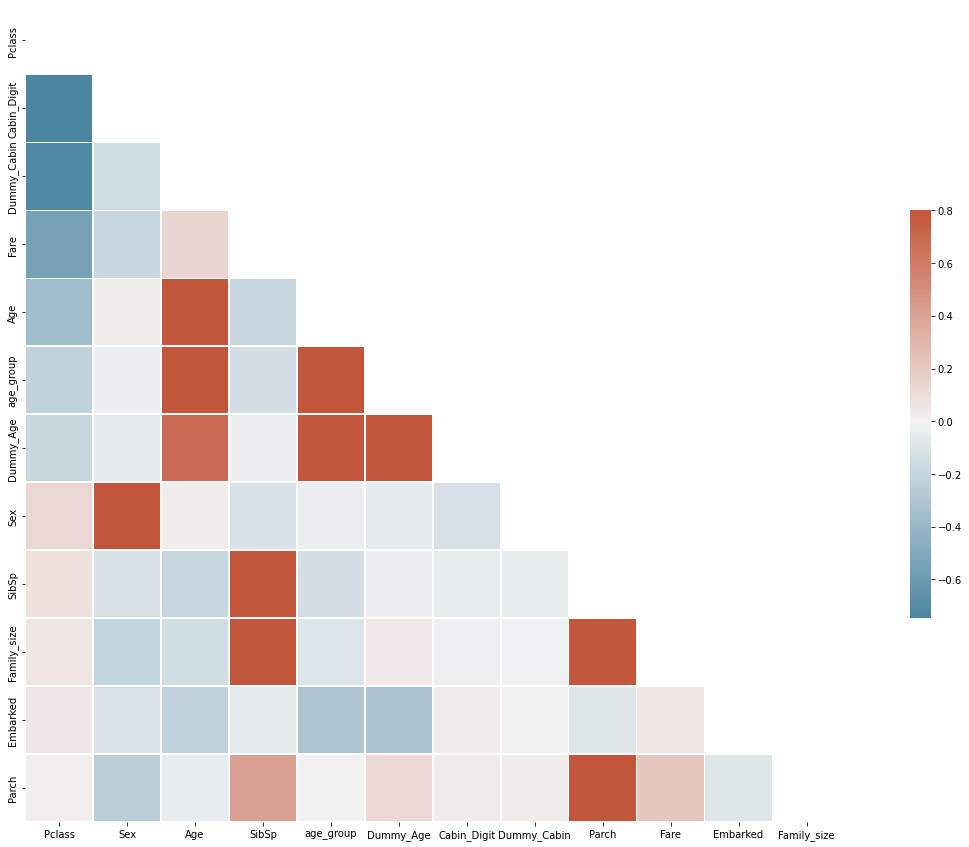

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))
#sns.heatmap(corrmat, vmax=.8, square=True);

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax = 0.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

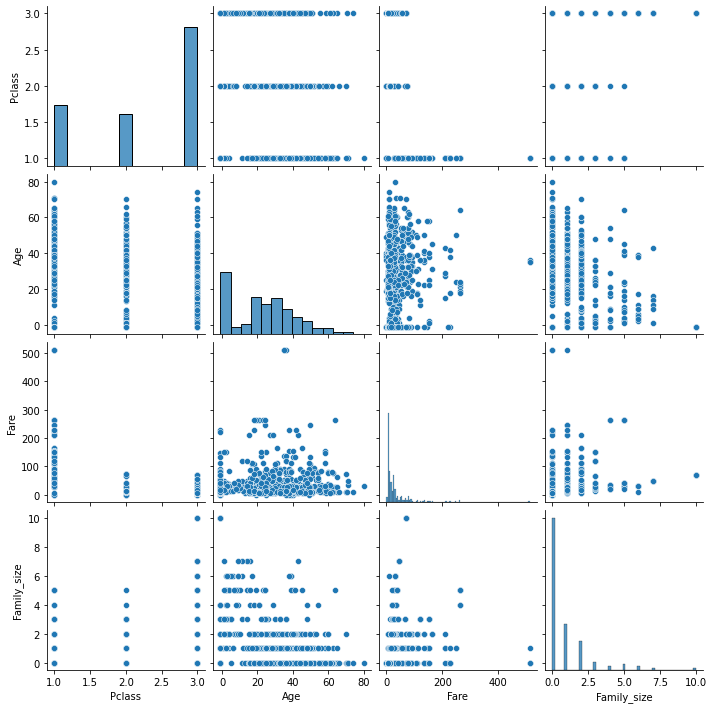

In [ ]:
y_features = ['Pclass', 'Age','Fare','Family_size']
features = y_features[1:]

sns.pairplot(df[y_features])

#### Let's take a close look into our dependent variable
 Here we will use Seaborn : https://seaborn.pydata.org/

Text(0.5, 1.0, 'Distribuition of Survieved')

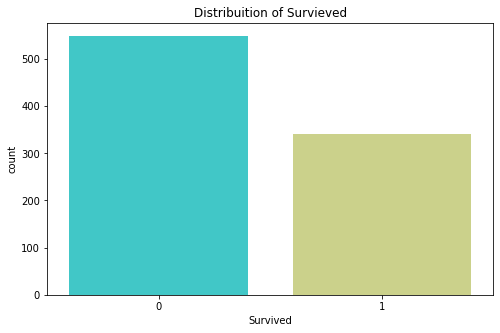

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived',data=titanic_df, palette='rainbow')
plt.title("Distribuition of Survieved")

When analysizing the graph above we can infer that our dependent variable is well balanced. About 300 passangers survived, while a little over 500 did not. 

# Section 6 - Data Visualization

Distribution of age by passenger class

Text(0.5, 1.0, 'Age by Passenger Class')

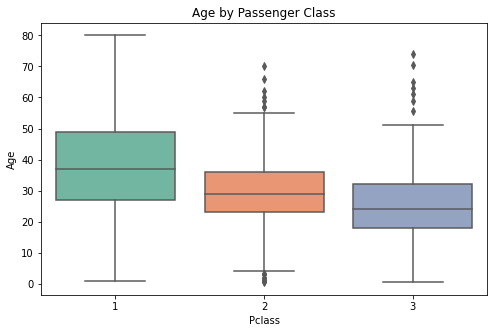

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=titanic_df, palette='Set2')
plt.title("Age by Passenger Class")

The graph "Age by Passenger Class" iulustrates the idea that people from the first class is relatively older than the other two classes. Also, people who embarked in the thrisd class is, on average, younger than the first and second class.

Age by Passenger Class, Separated by Survival

Text(0.5, 1.0, 'Age by Passenger Class and Survival, Titanic')

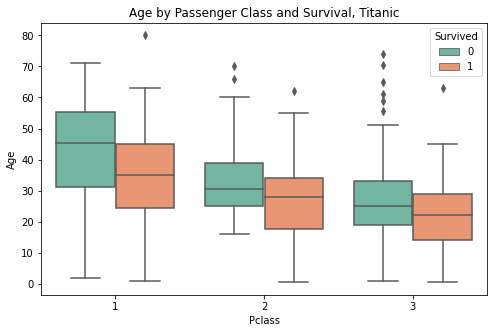

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass',y='Age',data=titanic_df, palette='Set2', hue="Survived")
plt.title("Age by Passenger Class and Survival, Titanic")

Text(0.5, 1.0, 'Age by Passenger Class and Survival, Titanic')

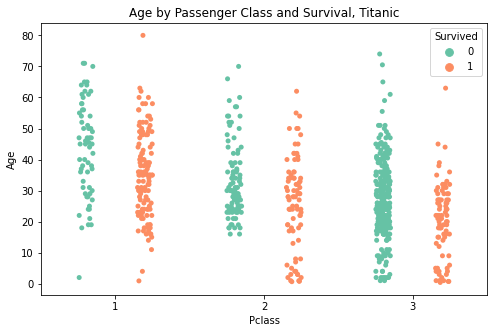

In [ ]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Pclass', y='Age', data=titanic_df, jitter=True, hue='Survived', dodge=True, palette='Set2')
plt.title("Age by Passenger Class and Survival, Titanic")

The two graphs above shows the relation between age, passanger class and survival status. We can see that people who were in the first class were older than second and third class. Also, in all classes people who survived were younger than those who did not. 

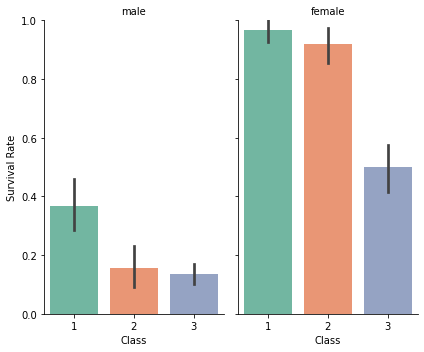

In [ ]:
g = sns.catplot(x='Pclass',y='Survived', col = 'Sex', data=titanic_df,
                kind='bar', aspect=.6, palette='Set2')


(g.set_axis_labels("Class", "Survival Rate")
  .set_titles("{col_name}")
  .set(ylim=(0,1)))


plt.tight_layout()
plt.savefig('seaborn_catplot.png', dpi=1000)

Count of Passengers that Embarked in Each City

In [ ]:
titanic_df.Embarked = titanic_df.replace(
    {"Embarked": {"S": "Southampton", 
             "C": "Cherbourg",
             "Q": "Queenstown",}}                
                  ).Embarked   

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City')

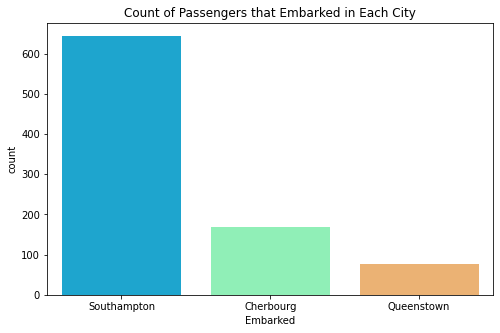

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow')
plt.title("Count of Passengers that Embarked in Each City")

Southampton was the location that most people have embarked, with a total surpassing the 600 passengers mark.

\\

Count of Passengers that Survived by Embarked City

Text(0.5, 1.0, 'Count of Passengers that Survived by Embarked City')

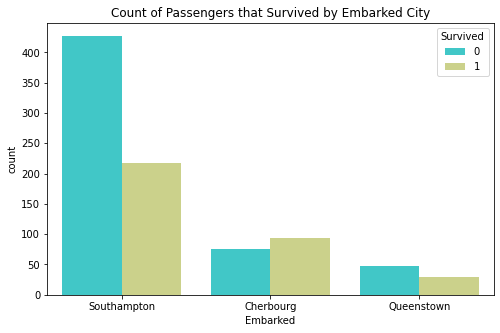

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Embarked City")

Most part of those who embarked in Southampton did not survive, gathering this information with what have been exposed in the graph bellow, this can be explanied because the biggest part of those passengers werw allocated in the third class. Also, Chebourg as the only location that passengrs surviver more that died, this can be explained because most part of them were refered to be in the dirst class. 

\\

Count of Passengers that Embarked in Each City by Class

Text(0.5, 1.0, 'Count of Passengers that Embarked in Each City by Class')

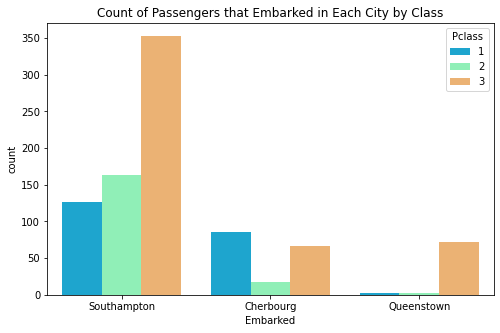

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked',data=titanic_df, palette='rainbow', hue="Pclass")
plt.title("Count of Passengers that Embarked in Each City by Class")

Cherbourg was the only location in which most passengers who embarked were in the first class

\\

Fare of Passenger by Embarked Town 

Text(0.5, 1.0, 'Fare of Passenger by Embarked Town, Divided by Class')

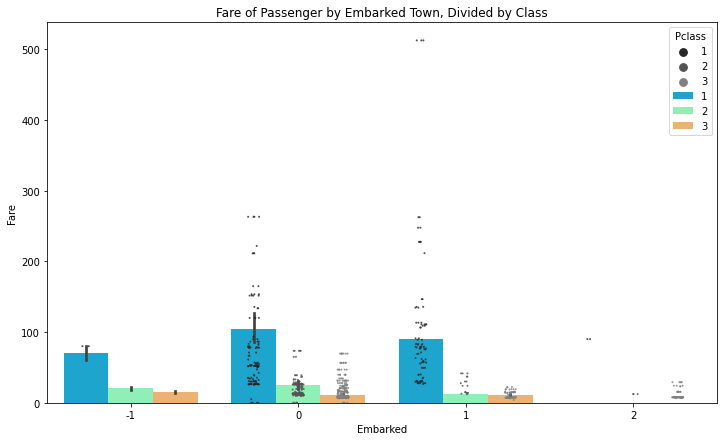

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x='Embarked',y='Fare',data=titanic_df, palette='rainbow', hue='Pclass')
sns.stripplot(x='Embarked',y="Fare",data=df, hue='Pclass', dodge='True', color='grey', alpha=.8, s=2)
plt.title("Fare of Passenger by Embarked Town, Divided by Class")

\\

Count of Passengers that Survived by Cabin Digit

In [ ]:
titanic_og = titanic_df

Cabin_Digit = titanic_og['Cabin'].str[0]
titanic_og.insert(5,'Cabin_Digit', Cabin_Digit)

titanic_og.Cabin_Digit = titanic_og.replace(
    {"Cabin_Digit": {"N": -1, 
             "T": 0,
             "G": 1,
             "F": 2,
             "E": 3,
             "D": 4, 
             "C": 5,
             "B": 6,
             "A": 7}}                
                  ).Cabin_Digit 

Text(0.5, 1.0, 'Count of Passengers that Survived by Cabin Digit')

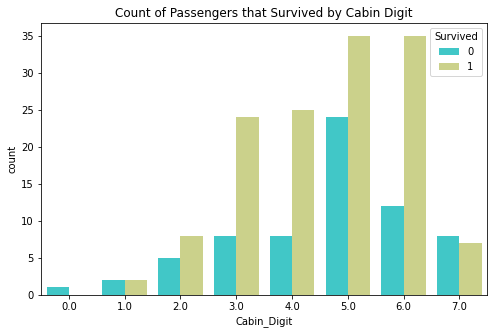

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cabin_Digit',data=titanic_og, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Cabin Digit") 

Creating a categorical variable for Age and plotting survival rate by age group

In [ ]:
category = pd.cut(titanic_og.Age, bins=[-1,0,2,17,65,99], labels=["Missing", "Toddler","Child","Adult","Elderly"])
titanic_og.insert(6,'age_group', category)

Text(0.5, 1.0, 'Count of Passengers that Survived by Age Group')

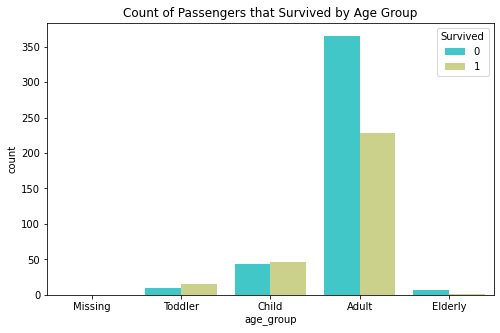

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='age_group',data=titanic_og, palette='rainbow', hue="Survived")
plt.title("Count of Passengers that Survived by Age Group")

# Section 7 - Preparing to use the ML models 

** Loading the test dataset and applying the same data prep and FE



From now on, we will start the preparation to run the models. We will create the matrix for the sklearn and do the feature importance using perturbation to discover the most important features. Next, we'll run our decision tree and random forest, AdaBoost, XGboost, and Loggist regression models to see the accuracies.

Dividing dataframes in matrices


In [ ]:
df = df.drop(['Name', 'Ticket', 'Cabin','Name_title'], axis=1) 

In [ ]:
X_train = df[:train_df.shape[0]]
#X_val = df[:val_df.shape[0]]
X_test = df[:test_df.shape[0]]
y_train = train_df.Survived
#y_val = val_df.Survived
y_test = test_df.Survived

In [ ]:
df.info()
type(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 192 to 872
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   age_group    891 non-null    int64  
 5   Dummy_Age    891 non-null    int64  
 6   Cabin_Digit  891 non-null    int64  
 7   Dummy_Cabin  891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Family_size  891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


pandas.core.frame.DataFrame

In [ ]:
df

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
192,3,0,19.0,1,2,1,-1,0,0,7.8542,0,1
191,2,1,19.0,0,2,1,-1,0,0,13.0000,0,0
714,2,1,52.0,0,2,1,-1,0,0,13.0000,0,0
532,3,1,17.0,1,1,1,-1,0,1,7.2292,1,2
132,3,0,47.0,1,2,1,-1,0,0,14.5000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
347,3,0,-1.0,1,-1,0,-1,0,0,16.1000,0,1
218,1,0,32.0,0,2,1,4,1,0,76.2917,1,0
239,2,1,33.0,0,2,1,-1,0,0,12.2750,0,0
491,3,1,21.0,0,2,1,-1,0,0,7.2500,0,0


In [ ]:
#from sklearn.inspection import permutation_importance

#start_time = time.time()
#result = permutation_importance(
#    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
#)
#elapsed_time = time.time() - start_time
#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

#forest_importances = pd.Series(result.importances_mean, index=feature_names)

In [ ]:
#fig, ax = plt.subplots()
#forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
#ax.set_title("Feature importances using permutation on full model")
#ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
#plt.show()

In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
192,3,0,19.0,1,2,1,-1,0,0,7.8542,0,1
191,2,1,19.0,0,2,1,-1,0,0,13.0000,0,0
714,2,1,52.0,0,2,1,-1,0,0,13.0000,0,0
532,3,1,17.0,1,1,1,-1,0,1,7.2292,1,2
132,3,0,47.0,1,2,1,-1,0,0,14.5000,0,1


Filtering important features

In [ ]:
X_train.shape

(623, 12)

In [ ]:
X_test.shape

(268, 12)

In [ ]:
y_train.shape

(623,)

In [ ]:
y_test.shape

(268,)

In [ ]:
#features = ["Pclass", "Sex",  "age_group", "Cabin_Digit","Family_size,"Fare","Embarked"]
#X_train = X_train[features]

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
192,3,0,19.0,1,2,1,-1,0,0,7.8542,0,1
191,2,1,19.0,0,2,1,-1,0,0,13.0000,0,0
714,2,1,52.0,0,2,1,-1,0,0,13.0000,0,0
532,3,1,17.0,1,1,1,-1,0,1,7.2292,1,2
132,3,0,47.0,1,2,1,-1,0,0,14.5000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
579,3,1,32.0,0,2,1,-1,0,0,7.9250,0,0
502,3,0,-1.0,0,-1,0,-1,0,0,7.6292,2,0
537,1,0,30.0,0,2,1,-1,0,0,106.4250,1,0
196,3,1,-1.0,0,-1,0,-1,0,0,7.7500,2,0


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
192,3,0,19.0,1,2,1,-1,0,0,7.8542,0,1
191,2,1,19.0,0,2,1,-1,0,0,13.0000,0,0
714,2,1,52.0,0,2,1,-1,0,0,13.0000,0,0
532,3,1,17.0,1,1,1,-1,0,1,7.2292,1,2
132,3,0,47.0,1,2,1,-1,0,0,14.5000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
579,3,1,32.0,0,2,1,-1,0,0,7.9250,0,0
502,3,0,-1.0,0,-1,0,-1,0,0,7.6292,2,0
537,1,0,30.0,0,2,1,-1,0,0,106.4250,1,0
196,3,1,-1.0,0,-1,0,-1,0,0,7.7500,2,0


In [ ]:
# X_test = X_test[features]

In [ ]:
X_test

,Pclass,Sex,Age,SibSp,age_group,Dummy_Age,Cabin_Digit,Dummy_Cabin,Parch,Fare,Embarked,Family_size
192,3,0,19.0,1,2,1,-1,0,0,7.8542,0,1
191,2,1,19.0,0,2,1,-1,0,0,13.0000,0,0
714,2,1,52.0,0,2,1,-1,0,0,13.0000,0,0
532,3,1,17.0,1,1,1,-1,0,1,7.2292,1,2
132,3,0,47.0,1,2,1,-1,0,0,14.5000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
86,3,1,16.0,1,1,1,-1,0,3,34.3750,0,4
370,1,1,25.0,1,2,1,3,1,0,55.4417,1,1
165,3,1,9.0,0,1,1,-1,0,2,20.5250,0,2
780,3,0,13.0,0,1,1,-1,0,0,7.2292,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 192 to 872
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   age_group    891 non-null    int64  
 5   Dummy_Age    891 non-null    int64  
 6   Cabin_Digit  891 non-null    int64  
 7   Dummy_Cabin  891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  Family_size  891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 122.8 KB


# Section 8 - Decision Tree 

In [ ]:
#Scikit
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

import warnings
warnings.simplefilter('ignore')

In [ ]:
#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
#                    'Decision Tree no prune': accuracy_score(y_class_test,pred_dtc_noprune) },
#                    index=[0]                    )

#accuracy

In [ ]:
# Grow tree without prunning
#dtr_noprune = sk_tree.DecisionTreeRegressor().fit(X_train,y_train)

# Plot!
#dot_data = sk_tree.export_graphviz(dtr_noprune, out_file=None, 
#                     filled=True, rounded=True,
#                     feature_names = features) 

#graph = graphviz.Source(dot_data) 
#graph

In [ ]:
#pred_dtr_noprune = dtr_noprune.predict(X_test)

In [ ]:
#accuracy.loc['No Prune'] = [explained_variance_score(y_test, pred_dtr_noprune),
#                            mean_absolute_error(y_test,pred_dtr_noprune) ,
#                            median_absolute_error(y_test, pred_dtr_noprune),
#                            r2_score(y_test,pred_dtr_noprune)]

In [ ]:
# 3) Predict Naive

#y_pred_dtc = dtc.predict(X_test)
#pred_dtc_noprune = dtc_noprune.predict(X_test)
#cm_dtc = confusion_matrix(y_test, y_pred_dtc)



#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
                    #'Decision Tree no prune': accuracy_score(y_test,pred_dtc_noprune) },
                    #index=[0]                    )

#accuracy

#print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

## PCA --> https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
## Principal componente seria overall quality 

Adding depth to the trees

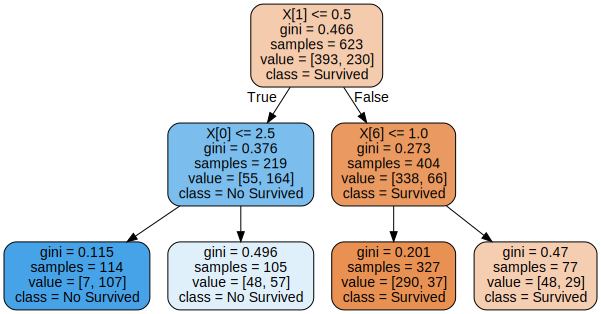

In [ ]:
dtc = sk_tree.DecisionTreeClassifier(max_depth = 2) # after we tested for the hyperparameters 
dtc_noprune = sk_tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)

dot_data = sk_tree.export_graphviz(dtc, out_file=None, 
                     class_names = ['Survived', 'No Survived'],
                     filled=True, rounded=True) 

graph = graphviz.Source(dot_data) 
graph

In [ ]:
# 3) Predict

y_pred_dtc = dtc.predict(X_test)
#pred_dtc_noprune = dtc_noprune.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)



#accuracy = pd.DataFrame({'Decision Tree': accuracy_score(y_test, pred_dtc),
                    #'Decision Tree no prune': accuracy_score(y_test,pred_dtc_noprune) },
                    #index=[0]                    )

#accuracy

print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

## PCA --> https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
## Principal componente seria overall quality 

Accuracy 0.4962686567164179


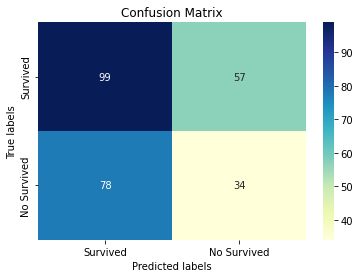

In [ ]:
# Now, lets check our Confusion Matrix for Decision Tree  

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
import time

dtc = sk_tree.DecisionTreeClassifier(max_depth = 2) 
dtc_noprune = sk_tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_noprune.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Accuracy", metrics.accuracy_score(y_test, y_pred_dtc))

training_start = time.perf_counter()
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Decision Tree's prediction accuracy is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f" % (dtc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (dtc_prediction_time))

Accuracy 0.4962686567164179
Decision Tree's prediction accuracy is: 49.63
Time consumed for training: 0.000
Time consumed for prediction: 0.00414 seconds


In [ ]:
# To optimize the hyperparameters 

# We got insights from: 
# 1. https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python
# 2. https://www.analyticsvidhya.com/blog/2020/11/hyperparameter-tuning-using-optuna/ 

# From link 1:

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
std_slc = StandardScaler()

In [ ]:
pca = decomposition.PCA()

In [ ]:
dec_tree = tree.DecisionTreeClassifier()

In [ ]:
 pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [ ]:
n_components = list(range(1,X_train.shape[1]+1,1))

In [ ]:
criterion = ['gini','entropy']
max_depth= [2,4,6,8,10,12]

In [ ]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)


In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 9

DecisionTreeClassifier(max_depth=6)


In [ ]:
#y_class_train = pd.qcut(y_train,q = 2, labels = ["0", "1"],duplicates='drop')
#y_class_test = pd.qcut(y_test,q = 2, labels = ["0", "1"])

#y_class_train.value_counts()

In [ ]:
# Retirado do https://towardsdatascience.com/an-exhaustive-guide-to-classification-using-decision-trees-8d472e77223f 
#clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
#clf_en.fit(X_train, y_train)
#y_pred_en = clf_en.predict(X_test)

In [ ]:
#def mean_absolute_percentage_error(y_true, y_pred): 
#    y_true, y_pred = np.array(y_true), np.array(y_pred)
#    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Section 9 - Random Forest


In [ ]:
# From: https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(X_test)
 
# using metrics module for accuracy calculation
print("Accuracy", metrics.accuracy_score(y_test, y_pred_rf))

# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

Accuracy 0.5261194029850746


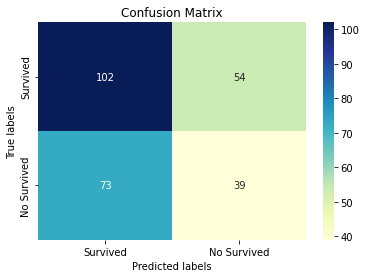

In [ ]:
# Now, lets check our Confusion Matrix for Random Forest

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

OPTIMIZING HYPERPARAMETERS

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
from scipy.stats import pearsonr

In [ ]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

In [ ]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)

In [ ]:
#train_scoreNum, test_scoreNum = validation_curve(
#                                RandomForestClassifier(),
#                                X = X_train, y = y_train, 
#                                param_name = 'n_estimators', 
#                                param_range = num_est, cv = 3)

Another try 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1000}

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    acc_rfc = metrics.accuracy_score(y_test, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}'.format(acc_rfc))
    return acc_rfc

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



Model Performance
Average Error: 0.4739 degrees.
Accuracy = 0.53


In [ ]:
#predictions = model.predict(X_test)
#acc_rfc = metrics.accuracy_score(y_test, predictions)

In [ ]:
acc_rfc = 0.53

# Section 10 - AdaBoost and XG Boost

AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# From:https://www.datacamp.com/tutorial/adaboost-classifier-python

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adb = model.predict(X_test)

In [ ]:
acc_abc=metrics.accuracy_score(y_test, y_pred_adb)

In [ ]:
# Computing model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_adb))

Accuracy: 0.47761194029850745


In [ ]:
# Confusion Matrix
cm_adb = confusion_matrix(y_test, y_pred_adb)

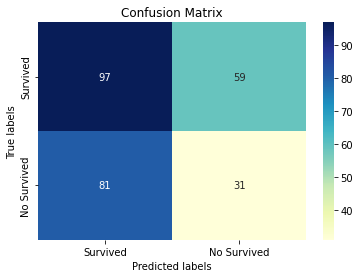

In [ ]:
# Now, lets check our Confusion Matrix for AdaBoost

labels = ["Survived", "No Survived"]

ax= plt.subplot()
sns.heatmap(cm_adb, annot=True, fmt='g', ax=ax, cmap="YlGnBu"); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [ ]:
training_start = time.perf_counter()
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = abc.predict(X_test)
prediction_end = time.perf_counter()
acc_abc = (preds == y_test).sum().astype(float) / len(preds)*100
abc_train_time = training_end-training_start
abc_prediction_time = prediction_end-prediction_start
print("AdaBoostClassifier's prediction accuracy is: %3.2f" % (acc_abc))
print("Time consumed for training: %4.3f seconds" % (abc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (abc_prediction_time))

AdaBoostClassifier's prediction accuracy is: 47.76
Time consumed for training: 0.000 seconds
Time consumed for prediction: 0.02122 seconds


XG Boosting

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
model = xgb.fit(X_train, y_train)
y_pred_xgb = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 50.37
Time consumed for training: 0.172
Time consumed for prediction: 0.00197 seconds


In [ ]:
acc_xgb=50.37

\\

# Section 11 - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train = X_train[["Sex","Fare","Family_size","Age","Cabin_Digit","Pclass"]]


In [ ]:
X_test = X_test[["Sex","Fare","Family_size","Age","Cabin_Digit","Pclass"]]

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.54

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,Age,0.077391
1,Pclass,0.000974
3,Sex,-0.024072
2,Name,-0.185135
5,SibSp,-0.931369
0,Survived,-2.952098
6,Parch,NaN
7,Ticket,NaN
8,Fare,NaN
9,Cabin,NaN


Comparing all models

In [ ]:
results = pd.DataFrame({
	    'Model': ['Decision Tree', 'AdaBoost',
	              'XGBoost', 'Random Forest',"Logistic Regression"],
	    'Score': [acc_dtc, acc_xgb, acc_abc*100, acc_rfc*100,acc_log]}) 

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
XGBoost,4776.119403
Logistic Regression,81.540000
Random Forest,53.000000
AdaBoost,50.373134
Decision Tree,49.626866


Running Feature Importance

In [ ]:
# FEATURE IMPORTANCE


from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(df.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:

import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 0.027 seconds


In [ ]:

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


ValueError: ignored

### Insights and Results 

In this section, we run our decision tree and the random forest, AdaBoost, XGboost, and Loggist regression models to compare their accuracies. Our best accuracy was reached by the model of Logistic Regression, with a score of 83%. However, the remaining models did not perform as well as expected, considering that other users who were taking part of the Titanic challenge were able to get an accuracy measure of over 75%. This indicates that feature engineering and model optimization should gain more attention in future attempts. Nevertheless, we discovered by the feature importance that Sex, Fare, Age, Cabin_Digit, and Pclass are the main characteristics that explain if a Titanic passenger survived the tragedy.

### Conclusion - next steps

Next steps of this work include advancing in feature engineering techniques, especially in creating a new variable Has_Title, which would encode the extracted titles that are considered rare. In addition, we believe combining the best models using stacking techniques would also be a further development path.
